In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
train = pd.read_csv("D://Analytics Vidya//agri//train_yaOffsB.csv")
test = pd.read_csv("D://Analytics Vidya//agri//test_pFkWwen.csv")

In [3]:
agri.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
agri.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

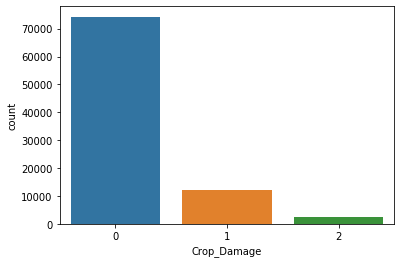

In [5]:
sns.countplot(agri.Crop_Damage)

In [6]:
agri.Crop_Type.value_counts()

0    63589
1    25269
Name: Crop_Type, dtype: int64

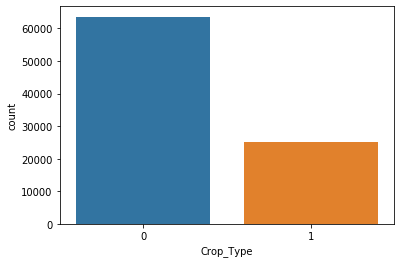

In [7]:
sns.countplot(agri.Crop_Type)

In [8]:
insects = agri.groupby(['Crop_Type'])['Estimated_Insects_Count'].mean()
insects

Crop_Type
0    1446.555977
1    1279.369148
Name: Estimated_Insects_Count, dtype: float64

In [9]:
a =insects.reset_index()

Text(0.5, 0, 'Crop Type')

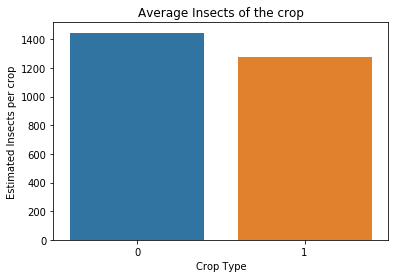

In [10]:
## average Insects of the crop. 
plt.title("Average Insects of the crop")
sns.barplot(x = 'Crop_Type' , y = 'Estimated_Insects_Count',data = a)
plt.ylabel("Estimated Insects per crop")
plt.xlabel("Crop Type")

In [11]:
agri.Pesticide_Use_Category.value_counts()

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64

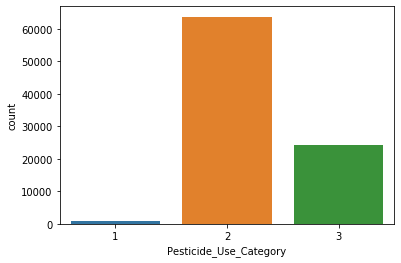

In [12]:
sns.countplot(agri.Pesticide_Use_Category)

In [13]:
agri.groupby(['Pesticide_Use_Category','Crop_Type'])['Estimated_Insects_Count'].describe()

count         mean          std    min  \
Pesticide_Use_Category Crop_Type                                             
1                      0            372.0  1643.908602  1055.240828  150.0   
                       1            465.0  1656.086022  1145.558084  150.0   
2                      0          50410.0  1475.553997   843.569772  150.0   
                       1          13299.0  1286.516956   776.832550  150.0   
3                      0          12807.0  1326.683611   863.337583  150.0   
                       1          11505.0  1255.880921   873.258360  150.0   

                                    25%     50%     75%     max  
Pesticide_Use_Category Crop_Type                                 
1                      0          789.0  1478.0  2401.0  4096.0  
                       1          625.0  1478.0  2541.0  4097.0  
2                      0          790.0  1296.0  2015.0  4097.0  
                       1          677.0  1132.0  1785.0  4097.0  
3                      0          625.0  1132.0  1898.0  4097.0  
                       1          531.0  1056.0  1785.0  4097.0

In [15]:
agri.groupby(['Crop_Type'])['Crop_Damage'].describe()

,count,mean,std,min,25%,50%,75%,max
Crop_Type,,,,,,,,
0,63589.0,0.195285,0.455736,0.0,0.0,0.0,0.0,2.0
1,25269.0,0.178677,0.450154,0.0,0.0,0.0,0.0,2.0


Text(732.4750000000001, 0.5, 'Crop Damage')

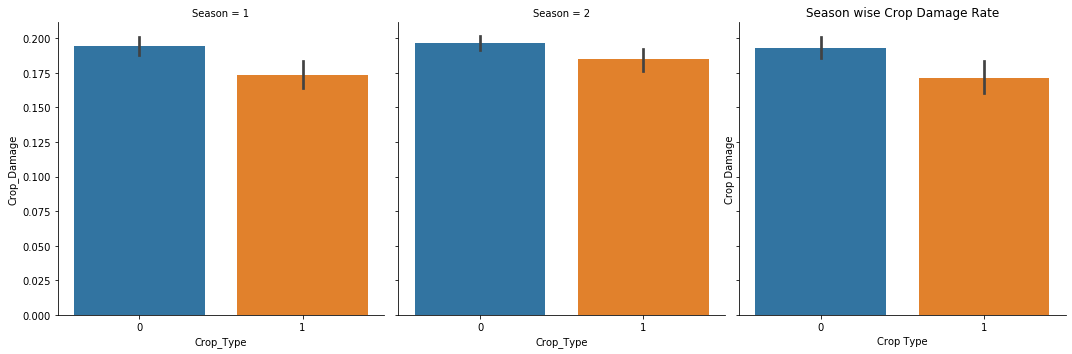

In [16]:
sns.catplot(x = 'Crop_Type' , y = 'Crop_Damage' , col = 'Season' , kind='bar',data = agri)
plt.title('Season wise Crop Damage Rate')
plt.xlabel('Crop Type')
plt.ylabel('Crop Damage')

In [17]:
agri.head(3)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1


In [19]:
agri.Number_Doses_Week.value_counts()

20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0       837
80      672
70      303
55      277
90       83
65       64
75       61
95       30
85       11
Name: Number_Doses_Week, dtype: int64

In [22]:
pesti = agri.groupby(['Crop_Type','Soil_Type','Pesticide_Use_Category'])['Number_Doses_Week'].max()

In [26]:
pesti = pesti.reset_index()
pesti

,level_0,index,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week
0,0,0,0,0,1,0
1,1,1,0,0,2,95
2,2,2,0,0,3,95
3,3,3,0,1,1,0
4,4,4,0,1,2,95
5,5,5,0,1,3,95
6,6,6,1,0,1,0
7,7,7,1,0,2,95
8,8,8,1,0,3,90
9,9,9,1,1,1,0


Text(0, 0.5, 'Number of doses')

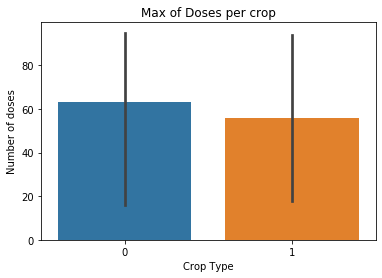

In [28]:
sns.barplot(pesti.Crop_Type , pesti.Number_Doses_Week)
plt.title('Max of Doses per crop')
plt.xlabel('Crop Type')
plt.ylabel('Number of doses')

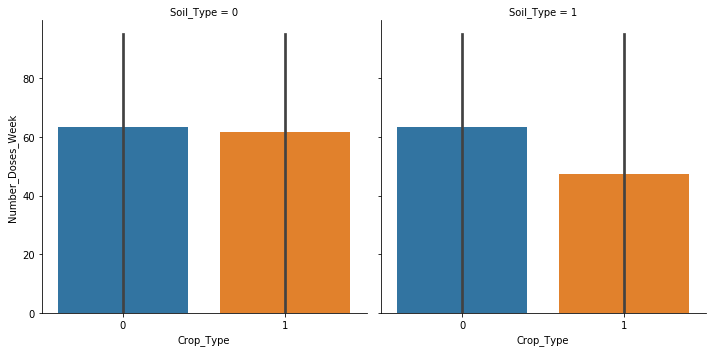

In [33]:
## graph that below shows that soil type 0 we use the number doses per week
sns.catplot(x = 'Crop_Type' , y = 'Number_Doses_Week' , col = 'Soil_Type',data = pesti,kind = 'bar')

In [34]:
agri.head(2)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1


In [41]:
weeks = agri.groupby(['Pesticide_Use_Category','Crop_Type','Number_Weeks_Used' ])['Estimated_Insects_Count'].describe()

In [44]:
weeks = weeks.reset_index()
weeks

,index,Pesticide_Use_Category,Crop_Type,Number_Weeks_Used,count,mean,std,min,25%,50%,75%,max
0,0,1,0,0.0,329.0,1628.328267,1046.820200,150.0,789.0,1385.0,2267.00,4096.0
1,1,1,1,0.0,411.0,1648.374696,1150.148612,150.0,577.0,1478.0,2471.50,4096.0
2,2,2,0,5.0,279.0,1440.670251,836.783044,168.0,731.5,1385.0,1898.00,3896.0
3,3,2,0,6.0,184.0,1146.472826,774.950123,168.0,577.0,851.0,1575.25,4096.0
4,4,2,0,7.0,219.0,1280.392694,751.347390,209.0,677.0,1132.0,1731.50,3702.0
...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,3,1,63.0,5.0,3466.600000,519.629002,2840.0,3165.0,3337.0,3895.00,4096.0
241,241,3,1,64.0,4.0,3482.000000,374.510347,3165.0,3165.0,3433.5,3750.50,3896.0
242,242,3,1,65.0,1.0,3515.000000,NaN,3515.0,3515.0,3515.0,3515.00,3515.0
243,243,3,1,66.0,3.0,3284.000000,262.543330,2999.0,3168.0,3337.0,3426.50,3516.0


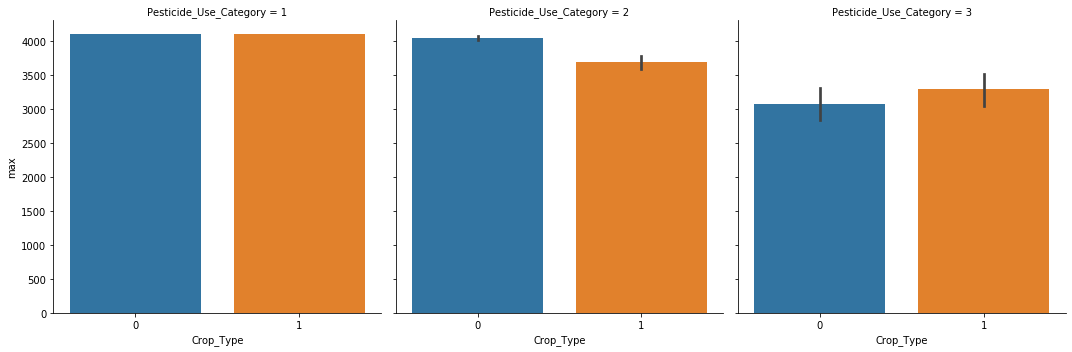

In [47]:
sns.catplot(x = 'Crop_Type',y = 'max',col ='Pesticide_Use_Category',data = weeks,kind = 'bar')

In [52]:
train.Number_Weeks_Used.describe()

count    79858.000000
mean        28.623970
std         12.391881
min          0.000000
25%         20.000000
50%         28.000000
75%         37.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

In [55]:
train.Number_Weeks_Used.fillna(value = '28' , inplace = True)
test.Number_Weeks_Used.fillna(value = '28' , inplace = True)

In [54]:
test.Number_Weeks_Used.describe()

count    53417.000000
mean        28.705094
std         12.421211
min          0.000000
25%         20.000000
50%         28.000000
75%         38.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

In [58]:
print(train.shape)

(88858, 10)


In [59]:
print(test.shape)

(59310, 9)


In [60]:
train.head(1)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0,0,1,0


In [63]:
newtrain = train.drop(['ID'],axis = 1)
newtest = test.drop(['ID'],axis=1)

In [70]:
x = newtrain.drop(['Crop_Damage'],axis = 1)
y = newtrain.Crop_Damage

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
Dtree = DecisionTreeClassifier()

In [73]:
model = Dtree.fit(x,y)

In [75]:
pre = model.predict(newtest)

In [76]:
pre

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [78]:
dtree = pd.DataFrame({"ID":test.ID , "Crop_Damage":pre})

In [82]:
dtree.to_csv("first.csv",index=False)

In [83]:
cd

C:\Users\jagannath


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier()

In [86]:
model = rf.fit(x,y)

In [89]:
pred = model.predict(newtest)

In [90]:
pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [91]:
rf = pd.DataFrame({"ID":test.ID , "Crop_Damage":pred})

In [92]:
rf

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,2
4,F00000014,1
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,1
59308,F00155943,0


In [93]:
sol = rf.to_csv("Rf.csv",index = False)

In [94]:
cd

C:\Users\jagannath
